# Point Estimation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import trim_mean
from scipy.stats import norm, expon

<div style="widht:100%; height:20px; background-color:plum;"></div>

## General Concepts of Point Estimation

**Statistical inference** is almost always directed toward drawing some type of conclusion about one or more **parameters (*population characteristics*)**. To do so requires that an investigator obtain **sample data** from each of the populations under study.
Conclusions can then be based on the computed values of various **statistics (*sample quantities*)**.
For example, let $\mu$ (a parameter) denote the true average lifetime of batteries of a certain type. A random sample of $n=10$
batteries might be made, and the lifetime of each one determined, resulting in observed strengths $x_1, x_2, \ldots , x_{10}$. The sample mean lifetime could then be used to draw a conclusion about the value of $\mu$. Similarly, if $\sigma^2$ is the variance of the batteries lifetime distribution (population variance, another parameter), the value of the sample variance $s^2$ can be used to infer something about $\sigma_2$.

Continuing the batteries lifetime example further, the sample of size $n$ of batteries lifetime might yield observed lifetimes (hours):

In [2]:
lifetimes = [5.0, 6.4, 5.9, 5.6, 5.7, 6.1, 6.2, 5.0, 5.8, 5.5]

and the computed value of the sample mean lifetime is

In [3]:
print(np.array(lifetimes).mean())

5.72


and it is reasonable to regard $5.72$ as a very plausible value of $\mu$—our "*best guess*" for the value of $\mu$ *based on the available sample information*.

> <div style="color: green;"><b>Definition of Point Estimate</b></div>
>
> A **point estimate** of a parameter $\theta$ is a single number $\hat{\theta}$ that can be regarded as a sensible value for $\theta$. A point estimate is obtained by selecting a suitable statistic and computing its value from the given sample data. The selected statistic $\hat{\Theta}$ is called the **point estimator** of $\theta$.

There may be one or more estimator that is reasonable to use to estimate a certain parameter. If there were only one reasonable point estimator for the parameter of interest, there would not be much to consider about point estimation. In most problems, though, there will be more than one reasonable estimator.

<span style="color: green;"><b><u>Example</u></b></span> 20 observations of dielectric breakdown voltage for
pieces of epoxy resin are observed to be (in volts):

Assume that the distribution of breakdown voltage is normal with mean value $\mu$. Because normal distributions are symmetric, $\mu$ is also the median lifetime of the distribution. The given observations are then assumed to be the result of a random sample $X_1, X_2, \ldots , X_{20}$ from this normal distribution. Consider the following estimators and resulting estimates for $\mu$:

In [4]:
bd_volt = np.array([24.46, 25.61, 26.25, 26.42, 26.66, 27.15, 27.31, 27.54, 27.74, 27.94, 
                    27.98, 28.04, 28.28, 28.49, 28.50, 28.87, 29.11, 29.13, 29.50, 30.88])

print("Estimator = sample mean            , estimate = ", bd_volt.mean())
print("Estimator = sample median          , estimate = ", np.median(bd_volt))
print("Estimator = avg. between min & max , estimate = ", (bd_volt.min() + bd_volt.max())/2)
print("Estimator = 10% trimmed sample mean, estimate = ", trim_mean(bd_volt, 0.1))

Estimator = sample mean            , estimate =  27.793
Estimator = sample median          , estimate =  27.96
Estimator = avg. between min & max , estimate =  27.67
Estimator = 10% trimmed sample mean, estimate =  27.838124999999998


Each one of the estimators uses a different measure of the center of the sample to estimate $\mu$. Which of the estimates is closest to the true value? We cannot answer this without knowing the true value of $\mu$. A question that can be answered is, "*Which estimator, when used on other samples of $X_i$'s, will tend to produce estimates closest to the true value?*" The following section will consider this type of question.

<div style="widht:100%; height:20px; background-color:plum;"></div>

## Unbiased Estimator

What are the desirable properties of a "good" decision function that would influence us to choose one estimator rather than another? Let $\hat{\Theta}$ be an estimator whose value $\hat{\theta}$ is a point estimate of some unknown population parameter $\theta$. Certainly, we would like the sampling distribution of $\hat{\Theta}$ to have a mean equal to the parameter estimated. An estimator possessing this property is said to be **unbiased**.

> A statistic $\hat{\Theta}$ is said to be an **unbiased estimator** of the parameter $\theta$ if
> $$ \mu_{\hat{\Theta}} = E(\hat{\Theta}) = \theta.$$

If $\hat{\Theta}$ is not unbiased, the difference $E(\hat{\Theta}) - \theta$ is called the **bias** of the estimator $\hat{\Theta}$.

For example, we can clearly see that $\bar{X}$ is an unbiased estimator for $\mu$ since $E(\bar{X})=\mu$ for any population of interest.

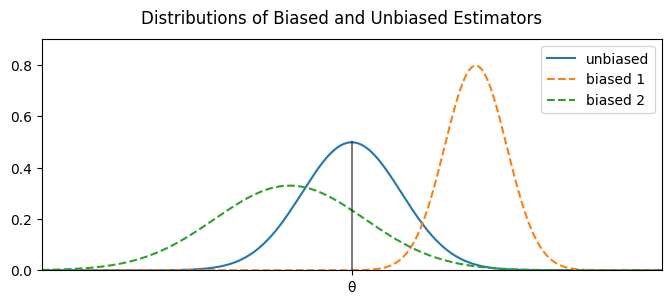

In [5]:
fig, ax = plt.subplots(1,1,figsize=(8,3))

fig.suptitle("Distributions of Biased and Unbiased Estimators")

xs = np.linspace(-5, 5, 200)
ys1 = norm.pdf(xs, 0, 0.8)
ys2 = norm.pdf(xs, 2, 0.5)
ys3 = norm.pdf(xs, -1, 1.21)

ax.plot(xs, ys1, label="unbiased")
ax.plot(xs, ys2, '--', label="biased 1")
ax.plot(xs, ys3, '--', label="biased 2")
ax.plot([0,0], [0, norm.pdf(0, 0, 0.8)], '-k', alpha=0.5)

ax.legend()
ax.set(
    xlim=[-5,5], ylim=[0,0.9],
    xticks=[0], xticklabels=["θ"]
);

<span style="color: green;"><b><u>Example (OPTIONAL)</u></b></span> Show that

$$
S^2 = \frac{1}{n-1}\sum_{i=1}^n (X_i - \bar{X})^2
$$

is an unbiased estimator of the parameter $\sigma^2$.

Consider the expected value of $S^2$:

$$
\begin{align}
E(S^2)
&= E\left[ \frac{1}{n-1}\sum_{i=1}^n (X_i - \bar{X})^2 \right] \\
&= \frac{1}{n-1}  E\left[ \sum_{i=1}^n X_i^2 - \frac{1}{n}\left( \sum_{i=1}^n X_i \right)^2  \right] \\
&= \frac{1}{n-1}  E\left[ \sum_{i=1}^n X_i^2 - \frac{T_n^2}{n} \right] \\
&= \frac{1}{n-1}  \left[ \sum_{i=1}^n E(X_i^2) - \frac{E(T_n^2)}{n} \right] \\
\end{align}
$$

Now we make use of the formula:

$$
\sigma^2_X = E(X^2) - \mu_X^2 \iff E(X^2) = \sigma^2_X + \mu^2_X
$$

So,

$$
\begin{align}
E(S^2)
&= \frac{1}{n-1} \left[ \sum_{i=1}^n (\sigma^2_{X_i} + \mu^2_{X_i}) - \frac{\sigma^2_{T_n} + \mu^2_{T_n}}{n} \right] \\
\end{align}
$$

but since $X_i$'s are drawn from the same population, we can substitute $\mu_{X_i}=\mu$ and $\sigma^2_{X_i} = \sigma^2$ and get:

$$
\begin{align}
E(S^2)
&= \frac{1}{n-1} \left( n\sigma^2 + n\mu^2 - \frac{n\sigma^2 + n^2\mu^2}{n} \right) \\
&= \frac{1}{n-1} \left( n\sigma^2 + n\mu^2 - \sigma^2 - n\mu^2 \right) \\
&= \frac{1}{n-1} \left[ (n-1)\sigma^2 \right] \\
&= \sigma^2 \\
\end{align}
$$

Thus, $S^2$ is an unbiased estimator of $\sigma^2$. Although $S_2$ is an unbiased estimator of $\sigma^2$, $S$, on the other hand, is usually a
biased estimator of $\sigma$, with the bias becoming insignificant for large samples. This example illustrates **why we divide by $n-1$ rather than $n$** when the variance is estimated.

---

Here are some of the commonly used unbiased estimator:

- The sample mean $\hat{X}$ is an unbiased estimator of population mean $\mu$.
- The sample variance $S^2$ is an unbiased estimator of population variance $\sigma^2$.
- The sample proportion $\hat{p}$ is an unbiased estimator of population proportion $p$.
- Additionally, if the population follows a continuous and symmetric distribution, then the sample median $\tilde{X}$ and any trimmed mean $\bar{X}_{tr(p)}$, the $p\%$ trimmed mean (discard the smallest and largest $p%$ of the sample and then average), are also unbiased estimators of $\mu$.

<div style="widht:100%; height:20px; background-color:plum;"></div>

## Variance of a Point Estimator

Suppose $\hat{\Theta}_1$ and $\hat{\Theta}_2$ are two estimators of $\theta$ that are both unbiased. Then, although the distribution of each estimator is centered at the true value of $\theta$, the spreads of the distributions about the true value may be different.

> If we consider all possible unbiased estimators of some parameter $\theta$, the one with the **smallest variance** is called the **minimum variance unbiased estimator (MVUE)** or **most efficient estimator** of $\theta$.

If we have two unbiased estimators $\hat{\Theta}_1$ and $\hat{\Theta}_2$ with $\sigma^2_{\hat{\Theta}_1} < \sigma^2_{\hat{\Theta}_2}$. Then, clearly, $\hat{\Theta}_1$ is more likely than $\hat{\Theta}_2$ to produce an estimate close to the true $\theta$. The MVUE is, in a certain sense, the most likely among all unbiased estimators to produce an estimate close to the true $\theta$. Thus we should always choose the MVUE when estimating a parameter, at least if it is known.

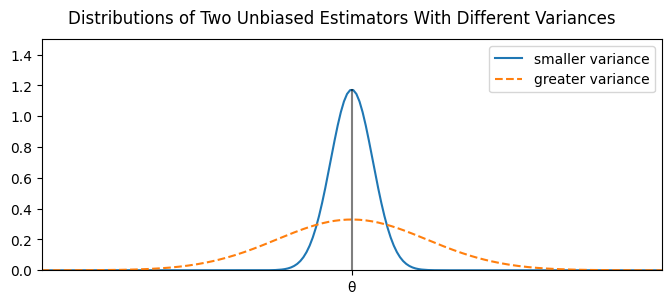

In [6]:
fig, ax = plt.subplots(1,1,figsize=(8,3))

fig.suptitle("Distributions of Two Unbiased Estimators With Different Variances")

xs = np.linspace(-5, 5, 200)
ys1 = norm.pdf(xs, 0, 0.34)
ys2 = norm.pdf(xs, 0, 1.21)

ax.plot(xs, ys1, label="smaller variance")
ax.plot(xs, ys2, '--', label="greater variance")
ax.plot([0,0], [0, norm.pdf(0, 0, 0.34)], '-k', alpha=0.5)

ax.legend()
ax.set(
    xlim=[-5,5], ylim=[0,1.5],
    xticks=[0], xticklabels=["θ"]
);

For normal populations, where $\bar{X}$ and $\tilde{X}$ are unbiased estimators of the population mean $\mu$, but the variance of $\bar{X}$ is smaller than the variance of $\tilde{X}$. Thus, both estimates $\bar{X}$ and $\tilde{X}$ will, on average, equal the population mean $\mu$, but $\bar{X}$ is likely to be closer to $\mu$ for a given sample, and thus $\bar{X}$ is more efficient than $\tilde{X}$. In fact, **$\bar{X}$ is the MVUE of $\mu$ for normal populations**.

<div style="widht:100%; height:20px; background-color:plum;"></div>

## The Standard Error

Besides reporting the value of a point estimate, some indication of its precision should be given. The usual measure of precision is the *standard error* of the estimator used.

> The standard error of an estimator $\hat{\Theta}$ is its standard deviation
> $$ \sigma_{\hat{\Theta}} = \sqrt{\textrm{Var}(\hat{\Theta})}. $$

The standard error is the magnitude of a typical or representative deviation between an estimate and the value of parameter $\theta$. If the standard error itself involves unknown parameters whose values can be estimated, substitution of these estimates into $\sigma_{\hat{\Theta}}$ yields
the **estimated standard error** (estimated standard deviation) denoted either by $\hat{\sigma}_{\hat{\Theta}}$ or by $s_{\hat{\Theta}}$.

<span style="color: green;"><b><u>Example</u></b></span> Continuing from the example of breakdown voltages:

Now we know that $\bar{X}$ is the best estimator for $\mu$. Which is calculated to be:

In [7]:
print("sample mean =", bd_volt.mean())

sample mean = 27.793


Suppose that the population standard deviation $\sigma$ is known to be $1.5$ volts, then the standard error of this estimation is

$$
\sigma_\bar{X} = \frac{\sigma}{\sqrt{n}} = \frac{1.5}{\sqrt{20}} \approx 0.335.
$$

If, as is usually the case, the value of $\sigma$ is unknown, the estimate $\hat\sigma$ (or $s$) can be calculated from the sample to be:

In [8]:
print("estimated standard deviation =", bd_volt.std())

estimated standard deviation = 1.4248406928495547


and we can substitute $\hat\sigma$ into $\sigma$ to get the estimated standard error of

$$
\hat\sigma_{\bar{X}} = \frac{\hat\sigma}{\sqrt{n}} = \frac{1.425}{\sqrt{20}} \approx 0.319.
$$

---
<h3 style="color: green; font-size: 16pt;">Bootstrapping (OPTIONAL)</h3>

The form of the estimator may be sufficiently complicated so that standard statistical theory cannot be applied to obtain an expression for the standard error $\sigma_{\hat\Theta}$. This is true, for example, in the case $\theta=\sigma$, $\hat\Theta=S$; the standard deviation of the statistic $S$, cannot in general be determined.

In recent years, a new computer-intensive method called the **bootstrap** has been introduced to address this problem. Bootstrapping in statistics is a resampling technique used when the underlying data distribution is unknown or difficult to approximate with traditional methods, especially when sample sizes are small or the statistic of interest is complex, or, as stated above, when one want an estimation method that standard error can be computed when the classical ways cannot.

> **Bootstrapping** is a procedure for estimating the distribution of an estimator by **resampling**. The basic idea of bootstrapping is that inference about a population from sample data (sample $\rightarrow$ population) can be modeled by resampling the sample data and performing inference about a sample from resampled data (resampled $\rightarrow$ sample) and then use that inference about the sample to make an inferance on the population (resampled $\rightarrow$ sample $\rightarrow$ population.)
> <center>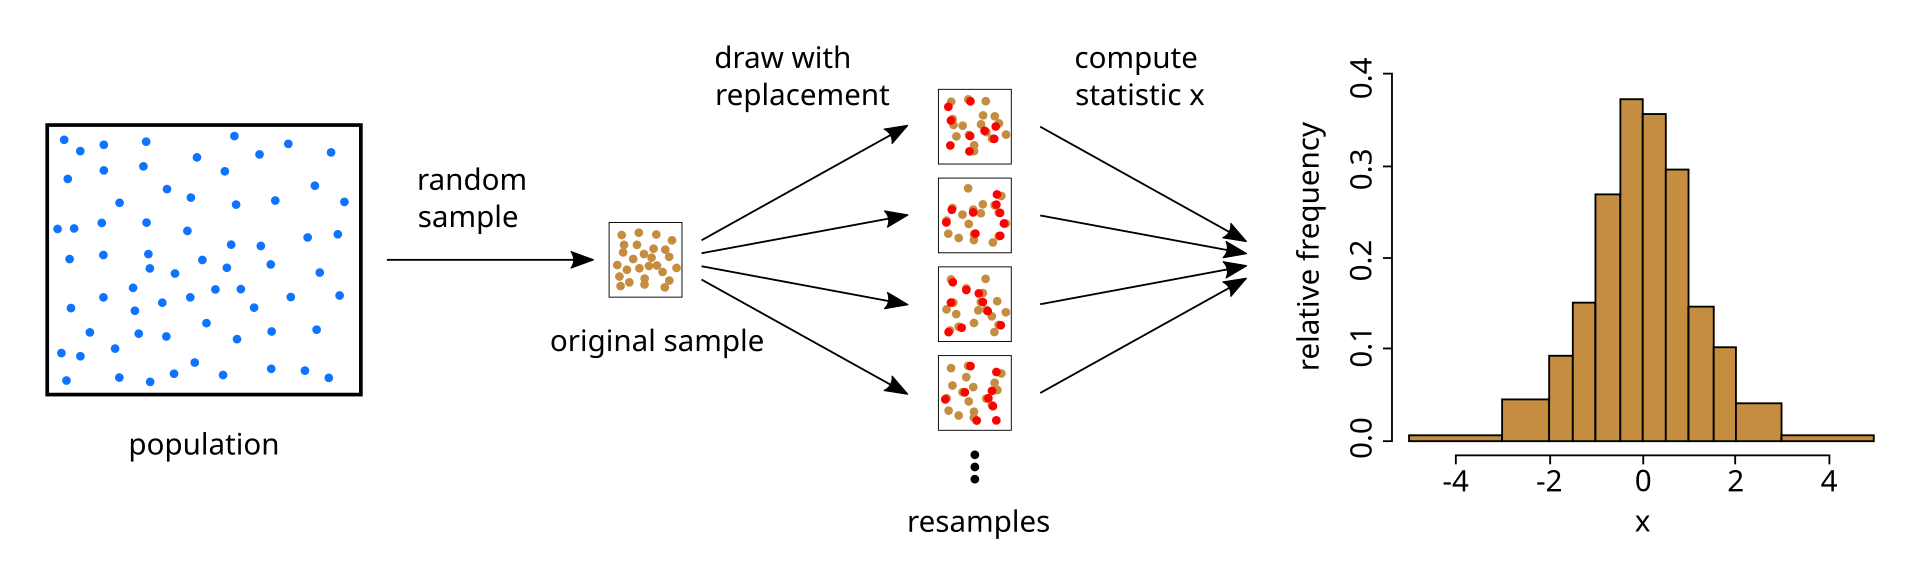</center>

Suppose that the population pdf is $f(x; \theta)$ that maybe known or unknown, and that data $x_1, x_2, \ldots, x_n$ gives an estimate $\hat\theta$. We now use the computer to obtain "bootstrap samples" from the pdf $f(x; \hat\theta)$ if $f$ is known, or resampling from the original sample $x_1, x_2, \ldots, x_n$ itself with replacement if $f$ is unknown, and for each bootstrap sample we calculate a "bootstrap estimate" $\hat\theta^*$:

- $1$st bootstrap sample: $x^*_{1,1}, x^*_{1,2}, \ldots, x^*_{1,n}$; bootstrap estimate = $\hat\theta^*_1$
- $2$nd bootstrap sample: $x^*_{2,1}, x^*_{2,2}, \ldots, x^*_{2,n}$; bootstrap estimate = $\hat\theta^*_2$
- And so on until $B$th bootstrap sample: $x^*_{B,1}, x^*_{B,2}, \ldots, x^*_{B,n}$; bootstrap estimate = $\hat\theta^*_B$

Now let 

$$
\bar\theta^* = \sum_{i=1}^B \frac{\hat\theta^*_i}{B},
$$

so $\bar\theta^*$ is the sample mean of the bootstrap estimates. The **bootstrap estimate** of $\hat\theta$'s standard error is now just the sample standard deviation of the $\hat\theta^*_i$'s:

$$
\sigma_{\hat\Theta} = \sqrt{ \frac{1}{B-1}\sum_{i=1}^B (\hat\theta^*_i - \bar\theta^*)^2 }
$$

<span style="color: green;"><b><u>Example</u></b></span> A theoretical model suggests that $X$, the time to breakdown of an insulating fluid between electrodes at a particular voltage, has 

$$
f(x; \lambda) = \lambda e^{\lambda x},
$$

an exponential distribution. A random sample of $n=10$ breakdown times (minutes) gives the following data:

Since $E(X) = E(\bar{X}) = 1/\lambda$ for an exponential rv, so a reasonable estimate of the unknown parameter $\lambda$ is $\hat\lambda = 1/\bar{x}$, for which calculated from the given data to be

In [9]:
bd_times = np.array([41.53, 18.73, 2.99, 30.34, 12.33, 117.52, 73.02, 223.63, 4.00, 26.78])
print("sample mean (x bar) =", bd_times.mean())
print("estimated lambda (1/x_bar) =", 1/bd_times.mean())

sample mean (x bar) = 55.087
estimated lambda (1/x_bar) = 0.01815310327300452


We then used a statistical computer package to obtain $B=100$ bootstrap
samples, each of size $10$, from $f(x; .018153)$ and calculate the bootstrap estimate $\hat\lambda^*_i$ of each sample:

In [10]:
np.random.seed(42)

# resample 100 bootstrap samples
B_samples = np.array([
    np.random.choice(bd_times, size=10, replace=True) for B in range(100)
    # expon.rvs(scale=1/0.01815310327300452, size=10) for B in range(100)

    # the above code is resampling from the original sample
    # alternatively, in this situation, we can resample from the distribution since it is known
    # the code for resampling from distribution is commented above
])

# calculate sample mean of each bootstrap sample
B_means = B_samples.mean(axis=1)

# calculate estimated lambda values based on sample means
B_lambda_estimates = 1 / B_means

# show the results
print("100 bootstrap estimates of lambda_hat:")
print(B_lambda_estimates)

100 bootstrap estimates of lambda_hat:
[0.01331398 0.01011071 0.02653787 0.04278075 0.02281334 0.01592078
 0.01754786 0.01751436 0.0094288  0.02048844 0.01266801 0.03442104
 0.02563117 0.02306433 0.03308848 0.01372834 0.01646307 0.01785555
 0.023822   0.01125378 0.0265252  0.0138652  0.03638348 0.04152824
 0.0106595  0.01519364 0.03144259 0.01204529 0.01233319 0.03723701
 0.0203434  0.01501998 0.01688476 0.0168563  0.01936746 0.01803622
 0.01498509 0.01796364 0.01926077 0.01934872 0.02667805 0.02801434
 0.02566076 0.01550075 0.0202012  0.02549525 0.02123052 0.02296211
 0.02540263 0.01617887 0.03146831 0.05821738 0.03319282 0.03268401
 0.01873185 0.01465373 0.02109927 0.02143393 0.0145881  0.05297171
 0.0108821  0.01651991 0.0239906  0.01622929 0.02159827 0.02735903
 0.03238971 0.02260398 0.01551759 0.02973447 0.02298639 0.01743162
 0.0131096  0.01283351 0.0305092  0.02565089 0.01966568 0.0130707
 0.013577   0.02911802 0.02526273 0.01461796 0.0169503  0.01333796
 0.01309809 0.01420212 0

And the average $\bar\lambda^*$ and the standard deviation or standard error $\hat\sigma_{\hat\lambda}$ of these 100 bootstrap estimates are 

In [11]:
print("mean bootstrap estimates  :", B_lambda_estimates.mean())
print("std of bootstrap estimates:", B_lambda_estimates.std())

mean bootstrap estimates  : 0.02132695269383291
std of bootstrap estimates: 0.009268376146248845


A histogram of the 100 $\hat\lambda^*_i$'s shown below was somewhat positively skewed, suggesting that the sampling distribution of $\hat\lambda$ also has this property.

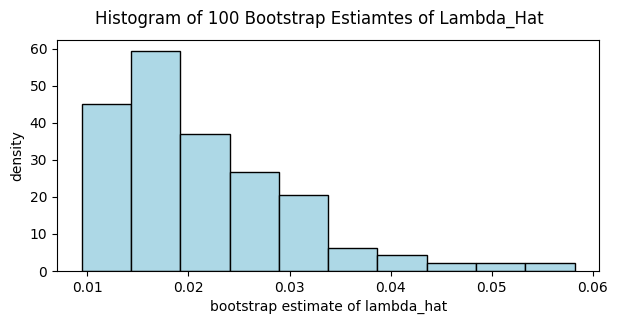

In [12]:
fig, ax = plt.subplots(1,1,figsize=(7,3))

fig.suptitle("Histogram of 100 Bootstrap Estiamtes of Lambda_Hat")

ax.hist(B_lambda_estimates, density=True, edgecolor="k", color="lightblue");
ax.set(xlabel="bootstrap estimate of lambda_hat", ylabel="density");

<div style="widht:100%; height:20px; background-color:plum;"></div>

## Methods of Point Estimations (OPTIONAL)

The definition of unbiasedness does not in general indicate how unbiased estimators can be derived. We now discuss two "constructive" methods for obtaining point estimators: the *method of moments* and the *method of maximum likelihood*.

---
<h3 style="color: green; font-size: 16pt;">The Method of Moments</h3>

The basic idea of this method is to equate certain sample characteristics, such as the mean, to the corresponding population expected values. Then solving these equations for unknown parameter values yields the estimators. 

> Let $X_1, X_2, \ldots, X_n$ be a random sample from a distribution with pmf or pdf $f(x; \theta_1, \ldots, \theta_m)$, where $\theta_1, \ldots, \theta_m$ are parameters whose values are unknown. Then the **moment estimators** $\hat\Theta_1, \ldots, \hat\Theta_m$ are obtained by equating the first $m$ sample moments to the corresponding first $m$ population moments and solving for $\theta_1, \ldots, \theta_m$.

<span style="color: green;"><b><u>Example</u></b></span> Let $X_1, X_2, \ldots, X_n$ represent a random sample of service times of $n$ customers at a
certain facility, where the underlying distribution is assumed exponential with parameter $\lambda$. 

Since there is only one parameter to be estimated, the estimator is obtained by equating $E(X)$ to $\bar{X}$. Since $E(X)=1/\lambda$ for an exponential distribution, this gives

$$
\frac{1}{\lambda} = \bar{X} \iff \lambda = \frac{1}{\bar{X}}.
$$

The moment estimator of $\lambda$ is then $\hat\lambda = 1/\bar{X}$.

---

<span style="color: green;"><b><u>Example</u></b></span> Let $X_1, X_2, \ldots, X_n$ be a random sample from a gamma distribution with parameters $\alpha$ and $\beta$. From [Chapter 4](Chapter%204%20-%20Well-Known%20Continuous%20Distributions.ipynb), we know that for a gamma rv $X$,

$$
\mu_X = \alpha\beta \quad\text{and}\quad \sigma^2_X = \alpha\beta^2,
$$

that is $E(X)=\alpha\beta$ and

$$
E(X^2) = \sigma^2_X + [E(X)]^2 = \alpha\beta^2 + \alpha^2\beta^2.
$$

The moment estimators of $\alpha$ and $\beta$ are obtained by solving the system of equations

$$
\bar{X} = \alpha\beta \quad\text{and}\quad \frac{1}{n}\sum_{i=1}^n X^2_i = \alpha\beta^2 + \alpha^2\beta^2
$$

We can substitute $\bar{X}=\alpha\beta$ into the second equation and get:

$$
\frac{1}{n}\sum_{i=1}^n X^2_i = \alpha\beta^2 + \bar{X}^2
$$

Diving each side of this equation by $\bar{X}=\alpha\beta$ so the equation becomes

$$
\begin{align}
\frac{(1/n)\sum_{i=1}^n X^2_i}{\bar{X}} &= \frac{\alpha\beta^2 + \bar{X}^2}{\alpha\beta} \\
                                        &= \beta + \frac{\bar{X}^2}{\alpha\beta} \\
                                        &= \beta + \frac{\bar{X}^2}{\bar{X}} \\
                                  \beta &= \frac{(1/n)\sum_{i=1}^n X^2_i - \bar{X}^2}{\bar{X}}
\end{align}
$$

Now we can substitute the value of $\beta$ into the first equation to solve for $\alpha$:

$$
\begin{align}
\bar{X} &= \alpha\beta \\
\alpha &= \bar{X}/\beta \\
&= \bar{X} \cdot \frac{\bar{X}}{(1/n)\sum_{i=1}^n X^2_i - \bar{X}^2} \\
&= \frac{\bar{X}^2}{(1/n)\sum_{i=1}^n X^2_i - \bar{X}^2}
\end{align}
$$

Therefore, the moment estimators of $\alpha$ and $\beta$ are

$$
\hat\alpha = \frac{\bar{X}^2}{(1/n)\sum_{i=1}^n X^2_i - \bar{X}^2} \quad\text{and}\quad \hat\beta = \frac{(1/n)\sum_{i=1}^n X^2_i - \bar{X}^2}{\bar{X}}.$$

To illustrate, suppose that the survival-time of (in weeks) mouse exposed to a certain radiation doses has a gamma distribution, and observations of survival-times are measured to be

with the first and second moment (sample mean and sample sum squared mean) of the sample:

In [13]:
s_times = np.array([152, 115, 109, 94, 88, 137, 152, 77, 160, 165, 125, 40, 128, 123, 136, 101, 62, 153, 83, 69])
print("sample sum mean (sample mean):", s_times.mean())
print("sample sum sqaured mean      :", (s_times**2).sum() / 20)

sample sum mean (sample mean): 113.45
sample sum sqaured mean      : 14087.75


Thus, the estimated values for the distribution parameters are

$$
\hat\alpha = \frac{(113.45)^2}{14,087.75 - (113.45)^2} \approx 10.577 \quad\text{and}\quad \hat\beta = \frac{14,087.75 - (113.45)^2}{113.45} \approx 10.726
$$

---
<h3 style="color: green; font-size: 16pt;">Maximum Likelihood Estimation</h3>

Let's start this section by considering an example use of the method of maximum likelihood.

<span style="color: green;"><b><u>Example</u></b></span> A sample of ten new bike helmets manufactured by a certain company is obtained.
Upon testing, it is found that the first, third, and tenth helmets are flawed, whereas the others are not. Let $p=P(\text{flawed helmet})$, i.e., $p$ is the proportion of all such helmets that are flawed. Define (Bernoulli) random variables $X_1, X_2, \ldots, X_10$ by

$$
X_i = \begin{cases}
    1 &\text{if the } i \text{th helmet is flawed} \\
    0 &\text{if the } i \text{th helmet isn't flawed}
\end{cases}
$$

Then for the obtained sample, $X_1=X_3=X_{10}=1$ and the other seven $X_i$'s are all zero. The probability mass function of any particular $X_i$ is 

$$
f_i(x) = p^{x}(1-p)^{1-x}.
$$

Now suppose that the conditions of various helmets are independent of one another. This implies that the $X_i$'s are independent, so their joint probability mass function is the product of the individual pmf's:

$$
f(x_1, x_2, \ldots, x_{10};\ p) = f_1(x_1)f_2(x_2) \cdots f_{10}(x_{10}).
$$

From the observed data, we obtain

$$
f(1,0,1,0,0,0,0,0,0,1;\ p) = f(p) = p^3(1-p)^7.
$$

Now the question is "For what value of $p$ is the obtained sample **most likely to have occurred**?" That is, what value of $p$ "maximizes" the joint pmf? The figure shown below shows a graph of the likelihood as a function of $p$. It appears that the graph reaches its peak above $p=.3$.

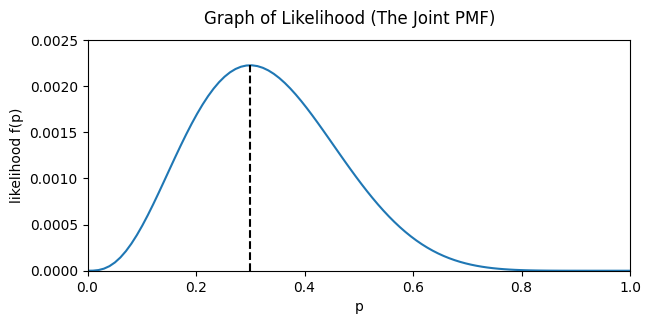

In [14]:
fig, ax = plt.subplots(1,1,figsize=(7,3))

fig.suptitle("Graph of Likelihood (The Joint PMF)")

xs = np.linspace(0,1,100)

ax.plot(xs, xs**3 * (1-xs)**7);
ax.plot([0.3,0.3], [0, 0.3**3 * 0.7**7], "--k")

ax.set(
    xlim=[0,1], ylim=[0,0.0025],
    xlabel="p", ylabel="likelihood f(p)"
);

We can verify our visual impression by using calculus to maximize the joint pmf. First consider the derivative of $f(p)$:

$$
\frac{d}{dp}f(p) = p^3 \cdot 7(1-p)^6 \cdot -1 + 3p^2(1-p)^7 = -7p^3(1-p)^6 + 3p^2(1-p)^7.
$$

We can equate $\frac{d}{dp}f(p)=0$ to find the value of $p$ that maximize the likelihood $f(p)$, but the equation can be tedious to solve. Instead we maximize the logarithm of $f(p)$:

$$
f(p) = p^3(1-p)^7 \iff \ln[f(p)] = 3\ln(p) + 7\ln(1-p).
$$

Since $\ln$ is a strictly increasing function, the maximum point of $\ln(f)$ is the same as $f(p)$, so we can do the same procedure on $\ln[f(p)]$, equating $\frac{d}{dp}\ln[f(p)]=0$, to get the value of $p$ that maximizes the likelihood:

$$
\begin{align*}
\frac{d}{dp}\ln[f(p)] = \frac{3}{p} - \frac{7}{1-p} &\stackrel{\text{set}}{=} 0 \\
3(1-p) &= 7p \\
\frac{1}{p} &= \frac{7}{3} + 1 \\
p &= \frac{3}{10} = .3
\end{align*}
$$

That is, our point estimate is $\hat{p}=.30$. It is called the *maximum likelihood estimate* because it is the parameter value that maximizes the likelihood(joint pmf) of the observed sample. In general, further analysis such as the second derivative test should be examined to make sure a maximum has been obtained (not minimum or saddle point), but here this is obvious from the given figure.

---
<h4 style="color: green;">Definition of Likelihood Function and MLE's</h4>

> Let $X_1, X_2, \ldots, X_n$ have joint pmf or pdf
> $$ f(x_1, x_2, \ldots, x_n;\ \theta_1, \ldots, \theta_m) $$
> where the parameters $\theta_1, \ldots, \theta_m$ have unknown values. When $x_1, x_2, \ldots, x_n$ are substituted with the observed sample values and the joint pmf/pdf is regarded as a function of $\theta_1, \ldots, \theta_m$ that may denoted
> $$ f(\theta_1, \ldots, \theta_m). $$
> Such function is called the **likelihood function**.

> The **maximum likelihood estimates (mle's)** $\hat\theta_1, \ldots, \hat\theta_m$ are those values of $\theta_i$'s that maximizes the likelihood function.

The likelihood function tells us how likely the observed sample is as a function of the possible parameter values. Maximizing the likelihood gives the parameter values for which the observed sample is most likely to have been generated—that is, the parameter values that “agree most closely” with the observed data.

---
<h4 style="color: green;">Estimating Functions of Parameters</h4>

> <div style="color: green;"><b>The Invariance Principle</b></div>
> Let $\hat\theta_1, \hat\theta_2, \ldots, \hat\theta_n$ be the maximum likelihood estimates (mle's) of the parameters $\theta_1, \theta_2, \ldots, \theta_n$. Then the mle's of any statistic $h(\theta_1, \theta_2, \ldots, \theta_n)$ of these parameters is $h(\hat\theta_1, \hat\theta_2, \ldots, \hat\theta_n)$ of the corresponding mle's.

---

<span style="color: green;"><b><u>Example</u></b></span> Let $X_1, X_2, \ldots, X_n$ be a random sample from a normal distribution $f(x;\ \mu, \sigma^2)$ (we parameterize the distribution with $\sigma^2$ instead of $\sigma$ just to simplify the calculation.) The likelihood function is

$$
\begin{align*}
f(x_1, x_2, \ldots, x_n;\ \mu, \sigma^2) &=
\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x_1-\mu)^2}{2\sigma^2}} \cdot
\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x_2-\mu)^2}{2\sigma^2}} \cdot\cdots\cdot
\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x_n-\mu)^2}{2\sigma^2}} \\ \\
&= \left( \frac{1}{\sqrt{2\pi\sigma^2}} \right)^n \exp\left( -\frac{\sum_{i=1}^n (x_i-\mu)^2}{2\sigma^2} \right) \\
&= \left( \frac{1}{2\pi\sigma^2} \right)^{n/2} \exp\left( -\frac{\sum_{i=1}^n (x_i-\mu)^2}{2\sigma^2} \right) \\
\end{align*}
$$

Regard the $x_i$'s as constants determined by observation values, the likelihood function is then a function of $\mu$ and $\sigma^2$. We can find the mle's of $\mu$ and $\sigma^2$ by taking the derivative (of the likelihood or its logarithm) with respect to each parameter, equate them to zero, and solve for the maximum point:

$$
\ln[f(\mu, \sigma^2)] = -\frac{n}{2}\ln(2\pi\sigma^2) - \frac{1}{2\sigma^2}\sum_{i=1}^n(x_i-\mu)^2
$$

Taking derivatives end equate them to zero:

$$ 
\frac{\partial}{\partial\mu}\ln(f) = \frac{1}{\sigma^2}\sum_{i=1}^n (x_i - \mu) \stackrel{\text{set}}{=} 0
$$

$$
\frac{\partial}{\partial\sigma^2}\ln(f) = -\frac{n}{2\sigma^2} + \frac{1}{2\sigma^4}\sum_{i=1}^n (x_i - \mu)^2 \stackrel{\text{set}}{=} 0
$$

One obvious solution to the first equation is $\mu = \bar{x}$ which makes the sums of $x_i - \mu$ equal $0$, using this result in the second equation, omitting the details, results in the mle's given by

$$
\hat\mu = \bar{X} \quad\text{and}\quad \hat\sigma^2 = \frac{\sum_{i=1}^n (X_i - \bar{X})^2}{n}
$$

We can see that the mle of $sigma^2$ is not an unbiased estimator, so two different principles (unbiasedness and maximum likelihood) yeild teo different estimators.

Now, by the invariance principle mentioned above, we can view the statistic $\sigma = \sqrt{\sigma^2}$ as a function of parameter. Thus

$$
\hat\sigma = \sqrt{\hat\sigma^2} = \sqrt\frac{\sum_{i=1}^n (X_i - \bar{X})^2}{n}
$$

is the mle for $\sigma$ for a normal population.

---
<h4 style="color: green;">Large Sample Behaviour of MLE's</h4>

Under very general conditions on the joint distribution (likelihood function) of the sample, when the
sample size $n$ is large, the maximum likelihood estimator $\hat\Theta$ of any parameter $\theta$
is approximately unbiased [$E(\hat\Theta)\approx\theta$] and has variance that is either as small
as or nearly as small as can be achieved by any estimator. 
Stated another way, **the mle $\hat\Theta$ is approximately the MVUE of $\theta$ when the sample size $n$ is large**.

Because of this result and the fact that calculus-based techniques can usually be used to derive the mle's (though often numerical methods, such as Newton's method, are necessary), maximum likelihood estimation is the most widely used estimation technique among statisticians. Obtaining an mle, however, does require that the underlying distribution be specified.

Do note that sometimes calculus cannot be used to obtain mle's, especially when the distribution is discrete. In such cases, other techniques of finding the maximum point of a function are needed instead.

<div style="widht:100%; height:20px; background-color:plum;"></div>